# The Battle of Neighborhoods

## 1. Introduction

Data science is an emerging field in which data management and analysis is carried out using various computer programing languages like python, R etc. Available data irrespective of its structure is processed through analytical, programming, visualization and business skills to draw valuable insights. These extracted insights play significant role in formulation of most appropriate and best solutions to various real world problems in both process and business perspectives. World being running towards fully digitalization, with internet of things around everywhere, it is very important to manage and analyse data in most meaningful and simple manner inorder to reduce the cost and effort of the system. For this reason, knowledge of data science with acquired skills is highly sorted out irrespective of the field of work we are into. With this introduction in place, would take you through an issue that would be addressed in this project where data science tools would help to understand the need better and equip with all required information for decision making.

### 1.1 Background

Toronto is the most popular and capital city of Ontario province in Canada. It is the largest city (population of 2,956,024 by July 2018) in canada and fourth populous city in North America and a world leader in areas like business, finance, technology, entertainment and culture. Every year tens of thousands of newcomers from around the globe choose this city as their new home because of which Toronto is one of the most multicultural urban areas in the world. Their diverse cultures and communities have helped create Toronto’s identity as a vibrant global city having a land area of 630 sq.km.Toronto’s weather broadly follows patterns for each of the four seasons. During spring the average temperature during the day is about 12°C in March, April and early May.cSummer in Toronto is at its warmest in July and August, with daytime temperatures averaging above 20°C and frequently rising above 30°C. Fall, or autumn, begins in September with mild temperatures falling steadily until the snowy winter season begins in December. Winter is Toronto’s coldest season, with temperatures usually below 0°C and snow falling frequently. January and February are the coldest months where temperatures can drop below -25°C. As per Economist Intelligence Unit – Global Liveability Index 2019, Toronto ranks as 7th most liveable cities in the world which proves it as most livable and competitive cities in the world. Toronto’s rankings in other fileds like best hospitals, safety etc. confirm that it continues to offer a high quality of life for 2.9 million residents who choose to live and work here.

Snippets of Toronto's historical events: When Europeans first arrived at the site of present-day Toronto, the vicinity was inhabited by the Iroquois, who had displaced the Wyandot (Huron) people, occupants of the region for centuries before c. 1500. The name Toronto is likely derived from the Iroquoian word tkaronto, meaning "place where trees stand in the water". People have travelled through and inhabited the Toronto area, located on a broad sloping plateau interspersed with rivers, deep ravines, and urban forest, for more than 10,000 years. After the broadly disputed Toronto Purchase, when the Mississauga surrendered the area to the British Crown, the British established the town of York in 1793 and later designated it as the capital of Upper Canada. During the War of 1812, the town was the site of the Battle of York and suffered heavy damage by United States troops. York was renamed and incorporated in 1834, as the city of Toronto. It was designated as the capital of the province of Ontario in 1867 during Canadian Confederation.

### 1.2 Problem Statement

Issue that has been considered in this capstone project is related to decision making regarding right neighborhood to reside when somebody has planned to migrate to a completely new city.
Consider a situation where a person got a good job offer from a great company in the city of Toronto. This person currently is well settled in a far distant country India residing in an established residential neighborhood. However, given the promising career prospects that this new job is offering, relocation seems to be a valid choice. Now, obviously, this person would be looking for a neighorhood closer to the work place where all the amenities are available. Further, being an Indian origin, this person would love to choose a neighborhood with high rated Indian restaurants available around. So in this capstone project, we compare various neighborhoods in toronto city inorder to find out the most suitable neighborhood interms of services and amenities. Also, best residential neighborhood with Indian restaurants nearby.

### 1.3 Objective

This study can be divided into two segment
1. The first objective of this project is to capture publicly available details on toronto city's neighborhoods and utilize them to analyze using machine learning algorithms and data visualization tools to find best suitable neighborhood in toronto city based on most common venues 

2. Second objective is to find best suitable neighborhood in toronto city where high rated Indian restaurants are available.

####  Target Group/Intended Audience
This analysis is intended to help all those who are frequent flyers to Toronto or relocated to Toronto and prefer to reside in a neighborhood with all the amenities and good rated Indian restaurants available in and around. This analysis also gives an understanding of the neighborhoods in the city where Indian restaurants are available and their counts in each area and best place to eat based on ratings.

## 2. Data

The following data would be needed for this project:
1. Toronto City data that contains list Boroughs, Neighborhoods

    Data source : 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
    
    Description : This data set contains the required information. And we will use this data set to explore various neighborhoods of Toronto city. This wiki data would be converted to pandas dataframe and further used. This will clear an understanding of number of boroughs and neighborhoods with their postal codes
    
   
2. Geo-spatial coordinate data of Toronto city

    Data source : 'https://cocl.us/Geospatial_data'
    
    Description : This will give latitude and longitudes data for every neighborhood in Toronto city. This data would be added to the existing neighborhoods data so as to get the consolidate information of the neighborhoods
    
    
3. Indian resturants in each neighborhood of new york city

    Data source : Fousquare API
    
    Description : All the venues in each neighborhood can be obtained using this API. Most coomon venues can be used to cluster the neighborhoods. Further, list of Indian restaurants can be filtered from the full list of venues. However we keep in mind the limitations of the Foursquare API credentials

## 3. Methodology

Step 1: Information obatained from the wiki page is scraped and created into a dataframe with postalcode, boroughs and neighborhoods of toronto city

Step 2: Geospatial data is used to obtain latitude and longitude details for each neighborhood and this data is merged to neighborhoods data from step 1

Step 3: Foursquare API is used to find all the venues in each neighborhood. 

Step 4: Clustering the neighborhoods based on common venues to explore the best suited/recommended one

Step 5: Filtering Indian restaurants from the venues list obtained from step 3. Exploring likes,ratings and tips of each Indian restaurant venue using Foursquare API and based on their counts assigning rank to each Indian restaurant

Step 6: Visualization of these restaurants in neighborhoods with ranking data using folium for decision making

### Step 1: Scraping and pandas dataframe creation

The following libraries are imported for python

In [2]:
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

#### 1.1 Scraping the wiki page data

In [4]:
#Converting wiki data into html
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(source,'lxml')
#print(soup.title)
from IPython.display import display_html
table = str(soup.table)


In [5]:
#converting html into pandas dataframe
Canada_dfs = pd.read_html(table)
Canada_df=Canada_dfs[0]
Canada_df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


#### 1.2 Cleaning of data with preprocessing

In [6]:
# 'Not assigned' Borough rows are dropped
Canada_df1 = Canada_df[Canada_df.Borough != 'Not assigned']

# Grouping with same Postal Code
Canada_df2 = Canada_df1.groupby(['Postal Code','Borough'], sort=False).agg(', '.join)
Canada_df2.reset_index(inplace=True)

# Neighborhoods which are 'Not assigned' are replaced with names of Borough
Canada_df2['Neighborhood'] = np.where(Canada_df2['Neighborhood'] == 'Not assigned',Canada_df2['Borough'], Canada_df2['Neighborhood'])
Canada_df2.rename(columns={'Postal Code':'PostalCode'},inplace=True)
Canada_df2.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [7]:
print('The size of dataframe is', Canada_df2.shape)

The size of dataframe is (103, 3)


### Step 2: Creating dataframe with geospatial data
#### 2.1 Creating dataframe using csv file

In [8]:
lat_lon = pd.read_csv('https://cocl.us/Geospatial_data')
lat_lon.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [11]:
lat_lon.rename(columns={'Postal Code':'PostalCode'},inplace=True)
#Torontogeo_df = pd.merge(Canada_df2,lat_lon,on='PostalCode')
#Torontogeo_df.head()
Toronto_df = pd.merge(Canada_df2,lat_lon,on='PostalCode')
Toronto_df.drop(['PostalCode'], axis=1, inplace=True)
Toronto_df

,Borough,Neighborhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,North York,Don Mills,43.745906,-79.352188
8,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


### Step 3: Exploring venues in each neighborhood
#### 3.1 Getting geographicalcoordinates of Toronto

In [12]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


#### 3.2 Creating map of Toronto neighborhoods

In [13]:
map_toronto = folium.Map(location=[latitude,longitude],zoom_start=10)

for lat,lng,Borough,Neighborhood in zip(Toronto_df['Latitude'],Toronto_df['Longitude'],Toronto_df['Borough'],Toronto_df['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
map_toronto

#### Foursquare credential and version that is used

In [14]:
CLIENT_ID = 'QYO0BT2QZ4LIKNTD1NUGGA0VFPCJIKS1VPJKF5RNYQ0PNGIW' 
CLIENT_SECRET = 'MTT4SVJ5GS1SDI2AICOX1ZSFGKO4F5SSD4KXBOUGS05YWPBT' 
VERSION = '20180605' 
LIMIT=100

#### 3.3 Function that explores venues in neighborhoods 

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
toronto_venues = getNearbyVenues(names=Toronto_df['Neighborhood'],
                                   latitudes=Toronto_df['Latitude'],
                                   longitudes=Toronto_df['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [18]:
print(toronto_venues.shape)
toronto_venues.head()

(2133, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,TTC stop #8380,43.752672,-79.326351,Bus Stop
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [21]:
#Count of venues for each neighborhood
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",26,26,26,26,26,26
Berczy Park,58,58,58,58,58,58
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16,16,16,16,16,16


In [22]:
#Number of unique categories
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 273 uniques categories.


#### 3.4 Analysis of each neighborhood

In [23]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#Size of toronto_onehot and toronto after grouped
print('size of toronto_onehot is', toronto_onehot.shape)
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
print('size of toronto_grouped is', toronto_grouped.shape)

size of toronto_onehot is (2133, 273)
size of toronto_grouped is (93, 273)


#### Considering 5 top venues in each grouped neighborhood

In [25]:
num_top_venues = 5
for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0                     Lounge   0.2
1             Breakfast Spot   0.2
2  Latin American Restaurant   0.2
3               Skating Rink   0.2
4             Clothing Store   0.2


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.25
1  Sandwich Place  0.12
2     Coffee Shop  0.12
3             Pub  0.12
4    Dance Studio  0.12


----Bathurst Manor, Wilson Heights, Downsview North----
                 venue  freq
0                 Bank  0.10
1          Coffee Shop  0.10
2                 Park  0.05
3          Supermarket  0.05
4  Fried Chicken Joint  0.05


----Bayview Village----
                 venue  freq
0                 Café  0.25
1                 Bank  0.25
2  Japanese Restaurant  0.25
3   Chinese Restaurant  0.25
4                Motel  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0          Restaurant  0.08
1  Italian Restaurant  0.08
2         Coffee Shop  0.08
3      

#### 3.5 Creating new pandas dataframe with top 10 most common venues

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Skating Rink,Lounge,Clothing Store,Breakfast Spot,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
1,"Alderwood, Long Branch",Pizza Place,Coffee Shop,Sandwich Place,Dance Studio,Pharmacy,Pub,Gym,Airport Service,Falafel Restaurant,Ethiopian Restaurant
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Park,Ice Cream Shop,Sushi Restaurant,Shopping Mall,Middle Eastern Restaurant,Restaurant,Mobile Phone Shop,Deli / Bodega
3,Bayview Village,Chinese Restaurant,Café,Bank,Japanese Restaurant,Women's Store,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
4,"Bedford Park, Lawrence Manor East",Sandwich Place,Italian Restaurant,Restaurant,Coffee Shop,Sushi Restaurant,Pharmacy,Juice Bar,Liquor Store,Indian Restaurant,Butcher


## Neighborhood clustering
#### 3.6 creating dataframe with cluster and top 10 venues for each neighborhood


In [30]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 3], dtype=int32)

In [33]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = Toronto_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,Parkwoods,43.753259,-79.329656,3.0,Park,Bus Stop,Food & Drink Shop,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Event Space
1,North York,Victoria Village,43.725882,-79.315572,1.0,Portuguese Restaurant,Coffee Shop,Pizza Place,Intersection,French Restaurant,Hockey Arena,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1.0,Coffee Shop,Pub,Bakery,Park,Theater,Restaurant,Breakfast Spot,Café,Event Space,Performing Arts Venue
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1.0,Furniture / Home Store,Accessories Store,Clothing Store,Coffee Shop,Boutique,Miscellaneous Shop,Event Space,Women's Store,Vietnamese Restaurant,Construction & Landscaping
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1.0,Coffee Shop,Sushi Restaurant,Music Venue,Beer Bar,Smoothie Shop,Sandwich Place,Burger Joint,Burrito Place,Restaurant,Café


#### 3.7 Visualization of clusters

In [86]:
# Map creation
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
#map_clusters

#### 3.9 Examining the clusters

In [76]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,"Cliffside, Cliffcrest, Scarborough Village West",American Restaurant,Motel,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Women's Store


In [78]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Victoria Village,Portuguese Restaurant,Coffee Shop,Pizza Place,Intersection,French Restaurant,Hockey Arena,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant
2,"Regent Park, Harbourfront",Coffee Shop,Pub,Bakery,Park,Theater,Restaurant,Breakfast Spot,Café,Event Space,Performing Arts Venue
3,"Lawrence Manor, Lawrence Heights",Furniture / Home Store,Accessories Store,Clothing Store,Coffee Shop,Boutique,Miscellaneous Shop,Event Space,Women's Store,Vietnamese Restaurant,Construction & Landscaping
4,"Queen's Park, Ontario Provincial Government",Coffee Shop,Sushi Restaurant,Music Venue,Beer Bar,Smoothie Shop,Sandwich Place,Burger Joint,Burrito Place,Restaurant,Café
7,Don Mills,Coffee Shop,Restaurant,Gym,Japanese Restaurant,Beer Store,Asian Restaurant,Sporting Goods Shop,Bike Shop,Shopping Mall,Sandwich Place
8,"Parkview Hill, Woodbine Gardens",Pizza Place,Gym / Fitness Center,Athletics & Sports,Intersection,Fast Food Restaurant,Gastropub,Pharmacy,Pet Store,Bank,Dumpling Restaurant
9,"Garden District, Ryerson",Clothing Store,Coffee Shop,Cosmetics Shop,Middle Eastern Restaurant,Bubble Tea Shop,Café,Japanese Restaurant,Italian Restaurant,Theater,Bookstore
10,Glencairn,Park,Pizza Place,Pub,Japanese Restaurant,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dance Studio
12,"Rouge Hill, Port Union, Highland Creek",Bar,History Museum,Women's Store,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
13,Don Mills,Coffee Shop,Restaurant,Gym,Japanese Restaurant,Beer Store,Asian Restaurant,Sporting Goods Shop,Bike Shop,Shopping Mall,Sandwich Place


In [79]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,"Malvern, Rouge",Fast Food Restaurant,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Falafel Restaurant


In [81]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Parkwoods,Park,Bus Stop,Food & Drink Shop,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Event Space
21,Caledonia-Fairbanks,Park,Pool,Women's Store,Gourmet Shop,Curling Ice,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant
35,"East Toronto, Broadview North (Old East York)",Park,Convenience Store,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Women's Store
61,Lawrence Park,Park,Swim School,Bus Line,Dog Run,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant,Department Store
64,Weston,Convenience Store,Park,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Women's Store
66,York Mills West,Convenience Store,Park,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Women's Store
83,"Moore Park, Summerhill East",Restaurant,Trail,Park,College Stadium,Colombian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop
85,"Milliken, Agincourt North, Steeles East, L'Amo...",Park,Asian Restaurant,Playground,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
91,Rosedale,Park,Playground,Trail,Eastern European Restaurant,Dumpling Restaurant,Electronics Store,Drugstore,Donut Shop,Doner Restaurant,Dance Studio
98,"The Kingsway, Montgomery Road, Old Mill North",River,Pool,Park,College Stadium,Colombian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop


In [83]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,"Humberlea, Emery",Baseball Field,Women's Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Farmers Market
101,"Old Mill South, King's Mill Park, Sunnylea, Hu...",Business Service,Baseball Field,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Women's Store,Dessert Shop


### Step 5: Data Visualization

#### 5.1 Getting data of Indian Restaurant from Foursquare API

In [45]:
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

### 5.1 Number of neighborhoods for each borough

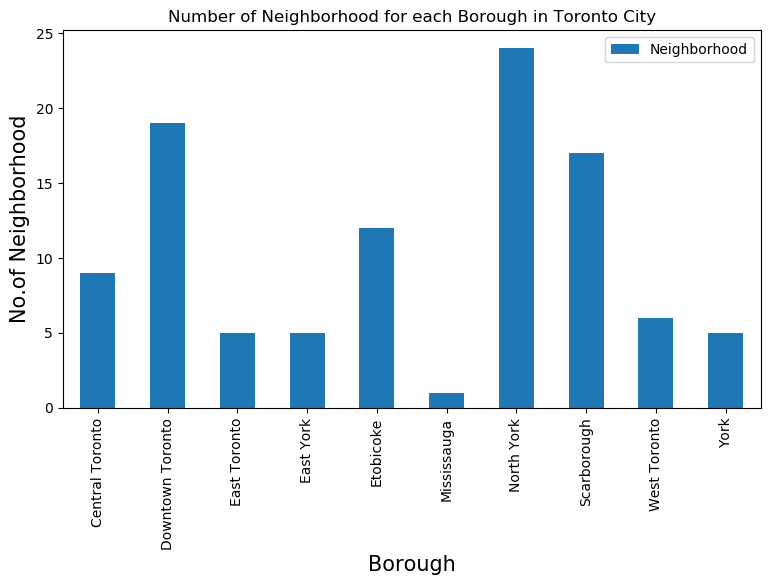

In [85]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in Toronto City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
Toronto_df.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [47]:
def get_venues(lat,lng):
    
    #set variables
    radius=500
    LIMIT=100
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [48]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_tor=pd.DataFrame(columns=column_names)
count=1
for row in Toronto_df.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(Toronto_df),')','Indian Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_tor = indian_rest_tor.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 103 ) Indian Resturants in Parkwoods, North York:0
( 2 / 103 ) Indian Resturants in Victoria Village, North York:0
( 3 / 103 ) Indian Resturants in Regent Park, Harbourfront, Downtown Toronto:0
( 4 / 103 ) Indian Resturants in Lawrence Manor, Lawrence Heights, North York:0
( 5 / 103 ) Indian Resturants in Queen's Park, Ontario Provincial Government, Downtown Toronto:0
( 6 / 103 ) Indian Resturants in Islington Avenue, Humber Valley Village, Etobicoke:0
( 7 / 103 ) Indian Resturants in Malvern, Rouge, Scarborough:0
( 8 / 103 ) Indian Resturants in Don Mills, North York:0
( 9 / 103 ) Indian Resturants in Parkview Hill, Woodbine Gardens, East York:0
( 10 / 103 ) Indian Resturants in Garden District, Ryerson, Downtown Toronto:0
( 11 / 103 ) Indian Resturants in Glencairn, North York:0
( 12 / 103 ) Indian Resturants in West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale, Etobicoke:0
( 13 / 103 ) Indian Resturants in Rouge Hill, Port Union, Highland Creek, Scarboroug

In [49]:
def get_venue_details(venue_id):
        
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

#### Creating list of Neighborhood with Indian restaurants

In [50]:
print(indian_rest_tor.shape)

(12, 4)


In [51]:
indian_rest_tor

,Borough,Neighborhood,ID,Name
0,Downtown Toronto,Central Bay Street,57c07e5f498ed3724a049dc1,Colaba Junction
1,East York,Thorncliffe Park,4daf08e66e81e2dffdd4fe40,Iqbal Kebab & Sweet Centre
2,East York,Thorncliffe Park,4bed9f2fbac3c9b6ad93fee9,Hakka Garden
3,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",50b79b94e4b0a577af25a83f,Indian Roti House
4,East Toronto,"The Danforth West, Riverdale",4c1d5337eac020a1cb1048c2,Sher-E-Punjab
5,North York,"Bedford Park, Lawrence Manor East",4d796616542ab1f75eb87c41,The Copper Chimney
6,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",5226562611d2cd49d83ef03b,Kairali
7,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",4bf96c435317a593a23a017f,Karaikudi Chettinad South Indian Restaurant
8,Central Toronto,"The Annex, North Midtown, Yorkville",4c62c59ce1621b8dd0332453,Roti Cuisine of India
9,Central Toronto,Davisville,5169d445e4b07de190b5c3d6,Marigold Indian Bistro


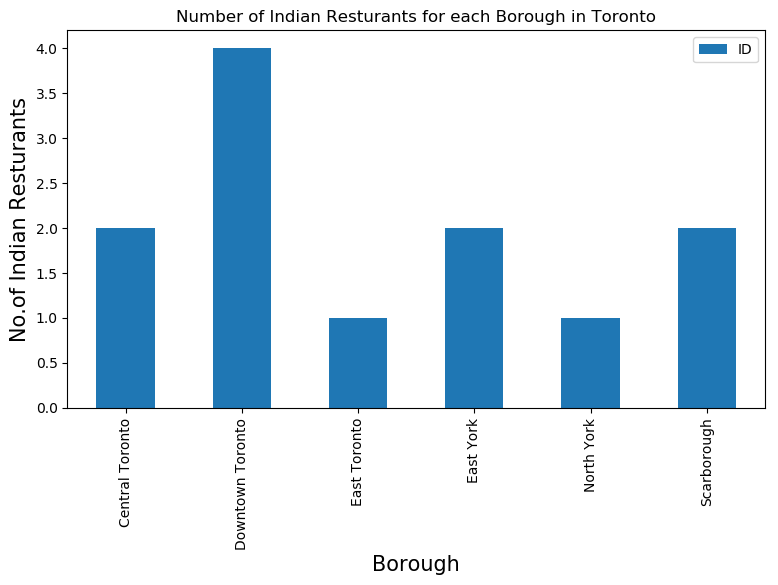

In [52]:

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Borough in Toronto')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_tor.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

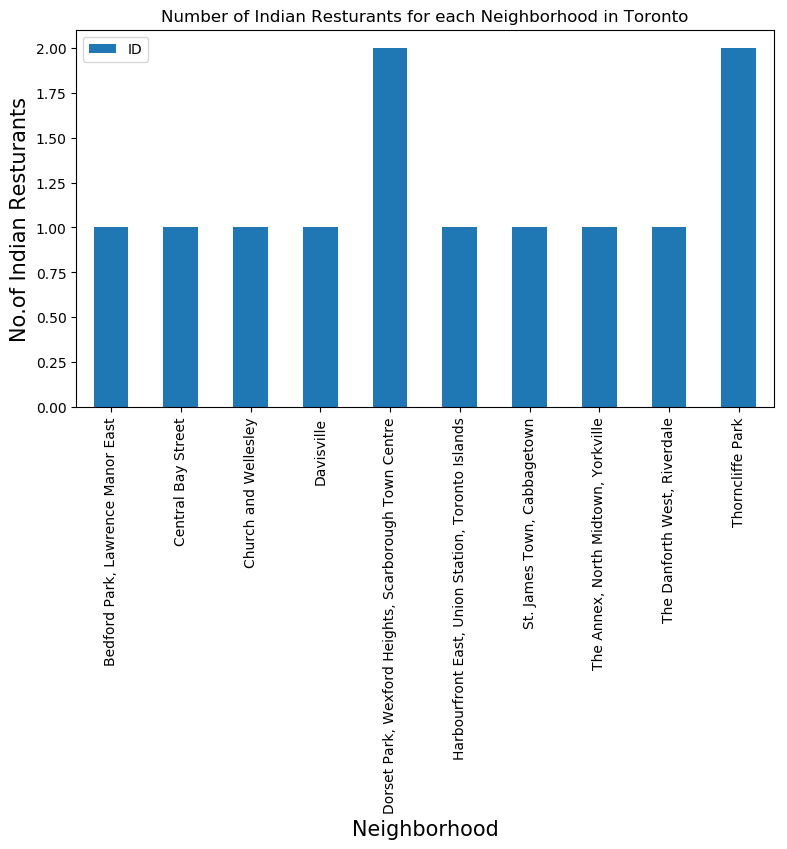

In [53]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Neighborhood in Toronto')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_tor.groupby('Neighborhood')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [54]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_tor=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_tor.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_tor),')','processed')
    indian_rest_stats_tor = indian_rest_stats_tor.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID             Name  Likes  Rating  Tips
0  57c07e5f498ed3724a049dc1  Colaba Junction     11     7.1     5
( 1 / 12 ) processed
                         ID                        Name  Likes  Rating  Tips
0  4daf08e66e81e2dffdd4fe40  Iqbal Kebab & Sweet Centre     13     7.6     6
( 2 / 12 ) processed
                         ID          Name  Likes  Rating  Tips
0  4bed9f2fbac3c9b6ad93fee9  Hakka Garden     10     6.4    12
( 3 / 12 ) processed
                         ID               Name  Likes  Rating  Tips
0  50b79b94e4b0a577af25a83f  Indian Roti House     38     7.1    14
( 4 / 12 ) processed
                         ID           Name  Likes  Rating  Tips
0  4c1d5337eac020a1cb1048c2  Sher-E-Punjab     10     7.0     8
( 5 / 12 ) processed
                         ID                Name  Likes  Rating  Tips
0  4d796616542ab1f75eb87c41  The Copper Chimney     14     7.4    15
( 6 / 12 ) processed
                         ID     Name  Likes  Rating  Tips
0 

In [55]:
indian_rest_stats_tor.shape

(12, 7)

In [56]:
indian_rest_stats_tor

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Downtown Toronto,Central Bay Street,57c07e5f498ed3724a049dc1,Colaba Junction,11,7.1,5
1,East York,Thorncliffe Park,4daf08e66e81e2dffdd4fe40,Iqbal Kebab & Sweet Centre,13,7.6,6
2,East York,Thorncliffe Park,4bed9f2fbac3c9b6ad93fee9,Hakka Garden,10,6.4,12
3,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",50b79b94e4b0a577af25a83f,Indian Roti House,38,7.1,14
4,East Toronto,"The Danforth West, Riverdale",4c1d5337eac020a1cb1048c2,Sher-E-Punjab,10,7.0,8
5,North York,"Bedford Park, Lawrence Manor East",4d796616542ab1f75eb87c41,The Copper Chimney,14,7.4,15
6,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",5226562611d2cd49d83ef03b,Kairali,9,7.2,6
7,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",4bf96c435317a593a23a017f,Karaikudi Chettinad South Indian Restaurant,27,6.5,23
8,Central Toronto,"The Annex, North Midtown, Yorkville",4c62c59ce1621b8dd0332453,Roti Cuisine of India,40,8.8,19
9,Central Toronto,Davisville,5169d445e4b07de190b5c3d6,Marigold Indian Bistro,11,8.1,11


In [57]:
indian_rest_stats_tor.to_csv('indian_rest_stats_tor.csv', index=False)

In [58]:
tor_neighborhood_stats=indian_rest_stats_tor.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
tor_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [59]:
tor_neighborhood_stats.sort_values(['Average Rating'],ascending=False)

,Neighborhood,Average Rating
7,"The Annex, North Midtown, Yorkville",8.80
6,"St. James Town, Cabbagetown",8.40
2,Church and Wellesley,8.10
3,Davisville,8.10
0,"Bedford Park, Lawrence Manor East",7.40
1,Central Bay Street,7.10
5,"Harbourfront East, Union Station, Toronto Islands",7.10
8,"The Danforth West, Riverdale",7.00
9,Thorncliffe Park,7.00
4,"Dorset Park, Wexford Heights, Scarborough Town...",6.85


In [60]:
tor_borough_stats=indian_rest_stats_tor.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
tor_borough_stats.columns=['Borough','Average Rating']

In [73]:
tor_borough_stats.sort_values(['Average Rating'],ascending=False)

,Borough,Average Rating
0,Central Toronto,8.450
1,Downtown Toronto,7.675
4,North York,7.400
2,East Toronto,7.000
3,East York,7.000
5,Scarborough,6.850


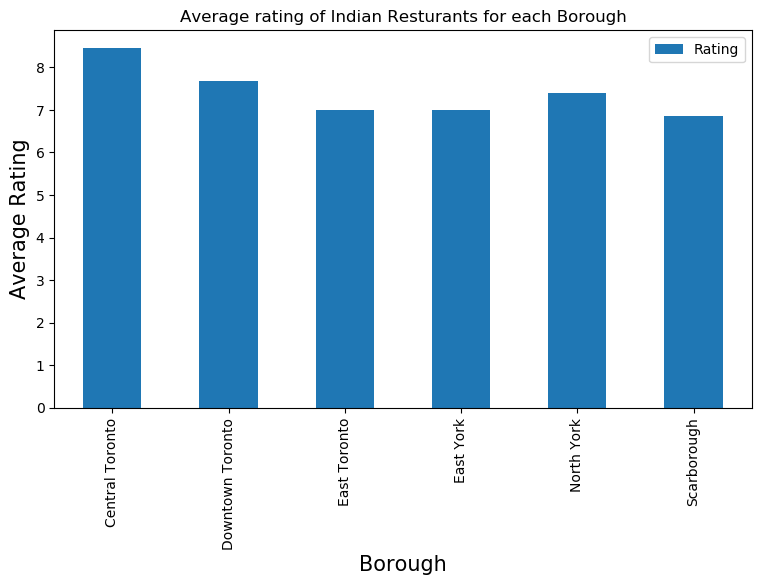

In [63]:

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Indian Resturants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
indian_rest_stats_tor.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

#### Merging borough and neighborhoods with geospatial corodinates and average rating

In [64]:
tor_neighborhood_stats=pd.merge(tor_neighborhood_stats,Toronto_df, on='Neighborhood')

In [65]:
tor_neighborhood_stats=tor_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
tor_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,7.40
1,Downtown Toronto,Central Bay Street,43.657952,-79.387383,7.10
2,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,8.10
3,Central Toronto,Davisville,43.704324,-79.388790,8.10
4,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",43.757410,-79.273304,6.85
5,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,7.10
6,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675,8.40
7,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,8.80
8,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,7.00
9,East York,Thorncliffe Park,43.705369,-79.349372,7.00


In [66]:
# create map and display it
tor_map = folium.Map(location=[latitude, longitude], zoom_start=12)


In [67]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in tor_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [68]:
tor_neighborhood_stats['Label']=tor_neighborhood_stats['Neighborhood']+', '+tor_neighborhood_stats['Borough']+'('+tor_neighborhood_stats['Average Rating'].map(str)+')'

In [69]:

# add pop-up text to each marker on the map
for lat, lng, label in tor_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(tor_map)        
# add incidents to map
tor_map.add_child(incidents)

### Results and Discussion

At first, number of neighborhoods are analysed in each borough. 
In the first segment of analysis, various neighbhorhoods are segmented for 10 most common venues. Further, these neighborhoods are clustered using K-means algorithm. All the neighborhoods are clustered into 5 and each cluster is examined with respect to first 10 most common venues.Cluster 2 labeled as 1 seems to have major amenities like coffee shops, pubs, restaurants and services however cluster 3 labeled as 2 also seems to have all the possible amenities.

In the second segment, all the neighborhoods of each borough are analysed for Indian Restaurants. Number of Indian restaurants in each borough and each neighbhorhood is analysed.Downtown Toronto borough has maximum of 4 Indian restaurants. Further, based on likes, tips and ratings, average rating of each restaurant is analysed and 12 restaurants are found to be given ratings. These are found to have ratings between 6.85 and 8.8 out of 10. Indian restaurant in central toronto has highest rating followed by downtown toronto borough.
Maximum number of restaurants are observed to be in Thorncliff Park and Dorset Park, Wexford Heights, Scarborough Town neighborhoods.

Thus comparing the secong segment results with first segment results, most of these nrihborhoods fall under cluster 2 and thus cluster 2 would be the better choice for an individual to reside with all the considered top 10 most common venues and high rated Indian restaurants

### Conclusions

The following are the highest rated and highest number of restaurants with respect to Boroughs and Neighborhoods in city of Toronto

#### Insight 1:
Highest average rating of Indian Restaurant: 8.8

Borough: Central Toronto

Neighborhood: The Annex, North Midtown, Yorkville

Name of Indian Restaurant: Roti Cuisine of India

#### Insight 2:
Highest number of Indian restaurants:4  

Borough:Down Toronto, Scarborough

#### Insight 3:
Highest number of Indian restaurants:2

Neighborhood:Thorncliffe Park -Iqbal kabab and sweet center

Neighborhood:Dorset Park, Wexford Heights, Scarborough Town - Kairali

#### Insight 4:
More number of top 10 most common venues with all amenities like coffee shops, women stores, parks, restaurants, auto shops etc

### Final Choice: 
Comparing all the choices, Cluster 2 is the most appropriate cluster to choose to reside in with 10 more top common venues available around in addition to Indian restaurants